### YouTube Project: Utilizing the YouTube Data API

YouTube Project: Utilizing the YouTube Data API

1.	API Key Creation: Generating an API Key through the Google Cloud Console using my Google account.

2. Data Access Documentation: Referring to the documentation available on developers.google.com to comprehend accessing data from YouTube through the 
   YouTube Data API.

3. Scraping, Analysis, and Visualization of Channel Statistics: Extracting data from various YouTube channels, including channel names, total video 
   counts, overall views, and total subscribers. Conducting a comparative analysis of these channels to track their growth trajectories.

4. Video Data Extraction and Analysis: Extracting data from individual videos within specific channels, including video views, total comments, likes, 
   and other relevant metrics. Following data extraction, conducting in-depth analysis and visualization.


In [ ]:
# Importing the libraries to use for working on the project.
from googleapiclient.discovery import build
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# API key retrieved from the Google Developers Console.
api_key = 'xXxXxXxXxX' # (here you use your YouTube api key)

# Channels IDs obtained for analysis. 
channel_ids = ['UC3t4HjrbrLD4vM13bc5Kgqg', # Projekte leicht gemacht
               'UCpNUYWW0kiqyh0j5Qy3aU7w', # Mısra Turp
               'UCq6XkhO5SZ66N04IcPbqNcw', # Keith Galli
               'UCzAF54cHk1ZO82af-8E3qOQ', # CareerFoundry
               'UCZe_ogqn3ZGC77M5gvk9dow', # KarriereFunk
               'UCLLw7jmFsvfIVaUFsLs8mlQ', # Luke Barousse
               'UC7cs8q-gJRlGwj4A8OmCmXg', # Alex the Analyst
               'UCDybamfye5An6p-j1t2YMsg'] # Mo Chen 

# Set up the YouTube service to send requests to the API and retrieve the data for analysis
youtube = build('youtube', 'v3', developerKey=api_key)

## Channels Statistics

In [4]:
# Function created to retrieve channel details 
def get_channel_stats_0(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
              part='snippet,contentDetails,statistics',
              id= ','.join(channel_ids))
    response = request.execute()
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    Country = response['items'][i]['snippet']['country'])
                   
        all_data.append(data)
                         
    return all_data

In [5]:
# Dictionary checked in JSON format for improved readability
#stringpretty_json = json.dumps(channel_statistics, indent=4)
#get_channel_stats_0(youtube, channel_ids)

In [1]:
# jason formatter:
# https://jsonformatter.curiousconcept.com/

In [6]:
# Data imported into a DataFrame using Pandas.
channel_statistics = get_channel_stats_0(youtube, channel_ids)
channel_data = pd.DataFrame(channel_statistics)
channel_data

,Channel_name,Subscribers,Views,Total_videos,Country
0,Luke Barousse,427000,21287039,156,US
1,Mo Chen,90000,3129943,108,GB
2,KarriereFunk,33700,6022805,762,DE
3,Mısra Turp,31100,1261436,143,NL
4,Alex The Analyst,737000,32076827,294,US
5,Projekte leicht gemacht,17000,1845056,75,DE
6,CareerFoundry,245000,12444171,371,DE
7,Keith Galli,214000,14784521,83,US


In [7]:
channel_data.dtypes

Channel_name    object
Subscribers     object
Views           object
Total_videos    object
Country         object
dtype: object

In [8]:
# New column added to classify the channels into their respective channel types.
channel_data['Channel_Type'] = ['Education','Education', 'Education', 'Education','Education','Education',
                                'Education','Education']
channel_data

,Channel_name,Subscribers,Views,Total_videos,Country,Channel_Type
0,Luke Barousse,427000,21287039,156,US,Education
1,Mo Chen,90000,3129943,108,GB,Education
2,KarriereFunk,33700,6022805,762,DE,Education
3,Mısra Turp,31100,1261436,143,NL,Education
4,Alex The Analyst,737000,32076827,294,US,Education
5,Projekte leicht gemacht,17000,1845056,75,DE,Education
6,CareerFoundry,245000,12444171,371,DE,Education
7,Keith Galli,214000,14784521,83,US,Education


In [9]:
# Data types for Subscribers, Views, and Total Videos converted to integers for visualization.
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
Country         object
Channel_Type    object
dtype: object

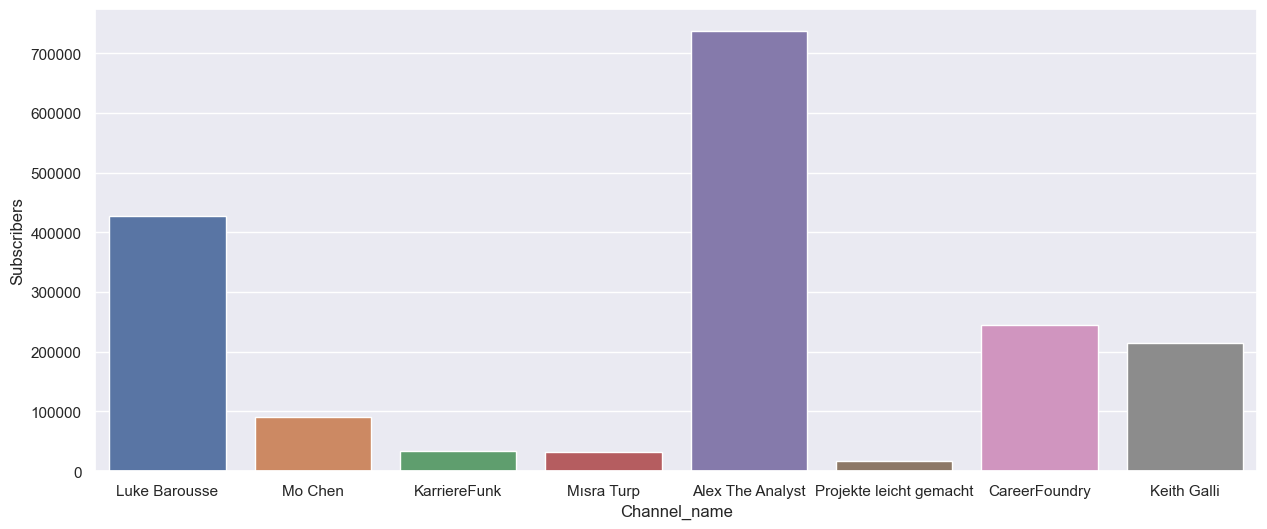

In [10]:
# Data visualized using Seaborn.
sns.set(rc={'figure.figsize': (15,6)})
ax = sns.barplot(data=channel_data, x='Channel_name', y='Subscribers', hue ='Channel_name')

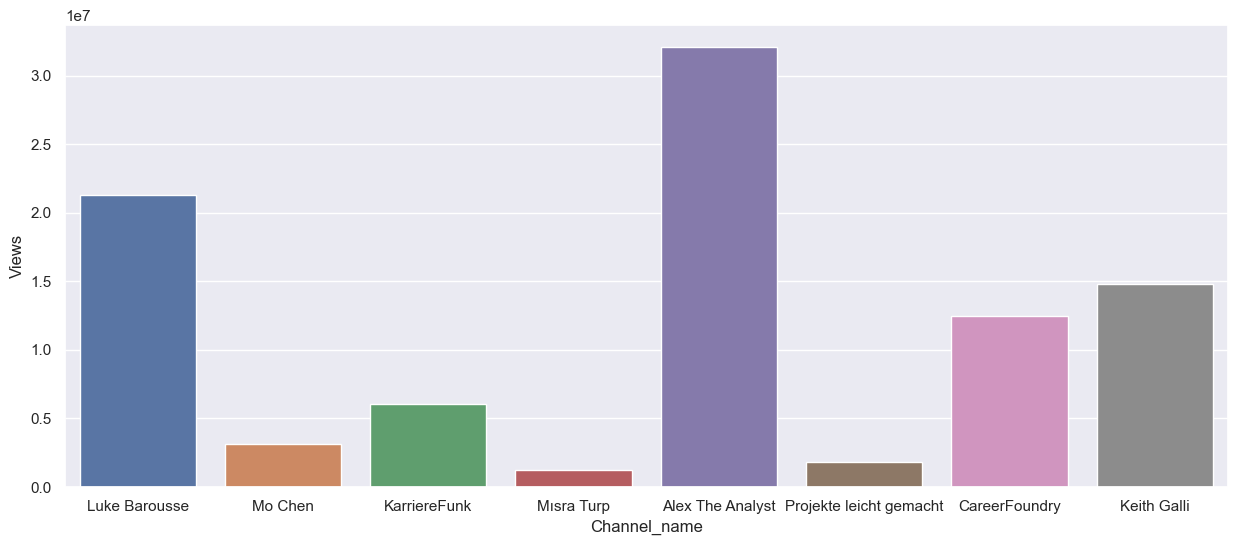

In [11]:
sns.set(rc={'figure.figsize': (15,6)})
ax = sns.barplot(data=channel_data, x='Channel_name', y='Views', hue ='Channel_name')

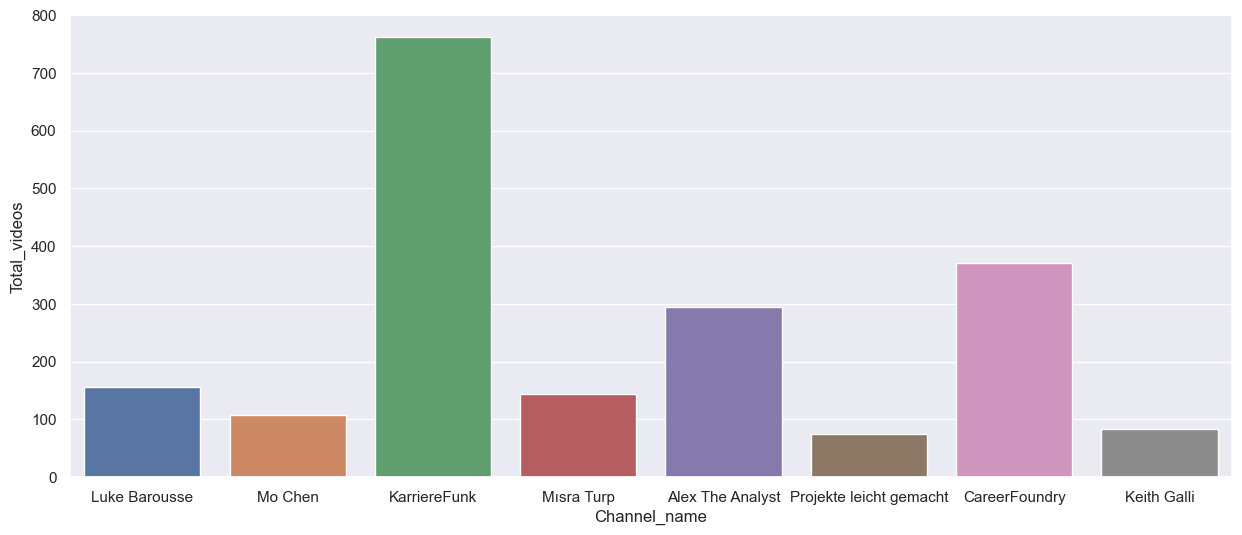

In [12]:
sns.set(rc={'figure.figsize': (15,6)})
ax = sns.barplot(data=channel_data, x='Channel_name', y='Total_videos', hue= 'Channel_name')
#plt.xticks(rotation=45)Channel_name

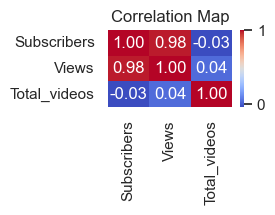

In [13]:
# Correlation matrix generated for Subscribers, Views, and Total Videos
channel_data_int = channel_data.loc[:,['Subscribers','Views','Total_videos']]
correlation_matrix = channel_data_int.corr()

# Correlation heatmap visualized
plt.figure(figsize=(2,1))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map')
plt.show()

In [14]:
correlation_matrix

,Subscribers,Views,Total_videos
Subscribers,1.000000,0.978406,-0.033975
Views,0.978406,1.000000,0.040770
Total_videos,-0.033975,0.040770,1.000000


We observe no correlation between the number of videos and subscribers, as well as between views and the number of videos. 
However, a strong correlation is evident between Subscribers and Views on the correlation map.

In [16]:
channel_data_num2 = channel_data.select_dtypes(include="number")
channel_data_num2

,Subscribers,Views,Total_videos
0,427000,21287039,156
1,90000,3129943,108
2,33700,6022805,762
3,31100,1261436,143
4,737000,32076827,294
5,17000,1845056,75
6,245000,12444171,371
7,214000,14784521,83


In [17]:
channel_data.columns

Index(['Channel_name', 'Subscribers', 'Views', 'Total_videos', 'Country',
       'Channel_Type'],
      dtype='object')

In [18]:
# saving the dataset
channel_data.to_csv('meine_yt_kanaele.csv')

In [19]:
# Developing a new function to create a dataset, this time incorporating the playlist_id for the channels.
def get_channel_stats_1(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
              part='snippet,contentDetails,statistics',
              id= ','.join(channel_ids))
    response = request.execute()
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    Country = response['items'][i]['snippet']['country'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
                   
        all_data.append(data)
                         
    return all_data

In [20]:
#get_channel_stats_1(youtube, channel_ids)
#jason formatter and validator = https://jsonformatter.curiousconcept.com/

In [21]:
# Utilizing Pandas to obtain a DataFrame with the new dataset
channel_statistics1 = get_channel_stats_1(youtube, channel_ids)
channel_data_1 = pd.DataFrame(channel_statistics1)
channel_data_1

,Channel_name,Subscribers,Views,Total_videos,Country,playlist_id
0,Keith Galli,214000,14784521,83,US,UUq6XkhO5SZ66N04IcPbqNcw
1,Luke Barousse,427000,21287039,156,US,UULLw7jmFsvfIVaUFsLs8mlQ
2,KarriereFunk,33700,6022805,762,DE,UUZe_ogqn3ZGC77M5gvk9dow
3,Alex The Analyst,737000,32076827,294,US,UU7cs8q-gJRlGwj4A8OmCmXg
4,Mo Chen,90000,3129943,108,GB,UUDybamfye5An6p-j1t2YMsg
5,Projekte leicht gemacht,17000,1845056,75,DE,UU3t4HjrbrLD4vM13bc5Kgqg
6,Mısra Turp,31100,1261436,143,NL,UUpNUYWW0kiqyh0j5Qy3aU7w
7,CareerFoundry,245000,12444171,371,DE,UUzAF54cHk1ZO82af-8E3qOQ


In [22]:
# Selecting the playlist from the 'Projekte leicht gemacht' channel.
playlist_id = channel_data_1.loc[channel_data_1['Channel_name']=='Projekte leicht gemacht', 'playlist_id'].iloc[0]
playlist_id

'UU3t4HjrbrLD4vM13bc5Kgqg'

## Video ids

In [23]:
# Function created to retrieve the video IDs from the playlist for the 'Projekte leicht gemacht' channel.
def get_video_ids(youtube, playlist_id):
  
    request = youtube.playlistItems().list(
                part = 'contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part = 'contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
            
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
                
            next_page_token = response.get('nextPageToken')
    
    return video_ids

In [24]:
video_ids = get_video_ids(youtube, playlist_id)

In [ ]:
# A list of video IDs for the channel 'Projekte leicht gemacht'.
video_ids

## Details von Video

In [96]:
# Function created to retrieve details from videos of the 'Projekte leicht gemacht' channel, including video title, published date, views, likes,
# and comments
def details_von_video(youtube, video_ids):
    
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        
        request = youtube.videos().list(
               part='snippet,statistics',
               id=','.join(video_ids[i:i+50]))
        response = request.execute()
    
        for video in response['items']:
           video_stats = dict(Title = video['snippet']['title'],
                               upload_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               Comments = video['statistics']['commentCount']
                               )
           all_video_stats.append(video_stats)
    
    return all_video_stats

In [97]:
# Creating a DataFrame with the new data using Pandas.
dt_video = details_von_video(youtube, video_ids)
videos_df = pd.DataFrame(dt_video)
videos_df

,Title,upload_date,Views,Likes,Comments
0,"""Projekte leicht gemacht"" stellt sich vor!",2024-01-09T16:07:13Z,2283,37,1
1,👉 Der Design Thinking Prozess,2022-10-06T03:30:05Z,8548,112,4
2,❓ Was ist Design Thinking? Die Methodik einfac...,2022-09-29T03:30:24Z,5136,102,5
3,ABC Analyse: Schrittweise am einfachen Beispie...,2022-04-07T03:30:16Z,26897,495,19
4,Ressourcenplanung und Kapazitätsplanung im Pro...,2022-03-10T04:30:02Z,20780,327,4
...,...,...,...,...,...
70,Das Pomodoro-Prinzip: Die wichtigsten Fragen u...,2020-05-14T06:15:00Z,3078,118,4
71,Morphologischer Kasten einfach erklärt [Kreati...,2020-05-14T06:15:00Z,34114,685,22
72,Was ist ein Projekt? (Teil 2) – Die Projektme...,2020-05-14T06:00:08Z,26514,747,16
73,Was ist ein Projekt? (Teil 1) – Eine anschaul...,2020-05-13T09:37:15Z,31835,648,9


In [98]:
# Data types for upload date, Views, Likes, and Comments successfully converted to integers for visualization.
videos_df['upload_date'] = pd.to_datetime(videos_df['upload_date']).dt.date
videos_df['Views'] = pd.to_numeric(videos_df['Views'])
videos_df['Likes'] = pd.to_numeric(videos_df['Likes'])
videos_df['Comments'] = pd.to_numeric(videos_df['Comments'])
videos_df

,Title,upload_date,Views,Likes,Comments
0,"""Projekte leicht gemacht"" stellt sich vor!",2024-01-09,2283,37,1
1,👉 Der Design Thinking Prozess,2022-10-06,8548,112,4
2,❓ Was ist Design Thinking? Die Methodik einfac...,2022-09-29,5136,102,5
3,ABC Analyse: Schrittweise am einfachen Beispie...,2022-04-07,26897,495,19
4,Ressourcenplanung und Kapazitätsplanung im Pro...,2022-03-10,20780,327,4
...,...,...,...,...,...
70,Das Pomodoro-Prinzip: Die wichtigsten Fragen u...,2020-05-14,3078,118,4
71,Morphologischer Kasten einfach erklärt [Kreati...,2020-05-14,34114,685,22
72,Was ist ein Projekt? (Teil 2) – Die Projektme...,2020-05-14,26514,747,16
73,Was ist ein Projekt? (Teil 1) – Eine anschaul...,2020-05-13,31835,648,9


In [99]:
# Top videos ranked by number of likes.
top_25_Videos = videos_df.sort_values(by='Likes', ascending=False).head(25)
top_25_Videos

,Title,upload_date,Views,Likes,Comments
10,"Kritischer Pfad, Gesamtpuffer und freier Puffe...",2021-12-02,118204,3220,83
12,Netzplan einfach erklärt: Ein Beispiel mit Vor...,2021-11-18,169352,3159,90
41,Projektmanagement-Grundlagen: Hier wird Projek...,2021-01-07,98190,1756,45
47,Konflikteskalation nach Glasl: Die 9 Eskalatio...,2020-11-05,108651,1735,41
45,Das Eisbergmodell der Kommunikation einfach er...,2020-11-19,77880,1289,39
5,Das Vier Ohren Modell: Praxisnahe Erklärung un...,2022-02-24,62959,1235,23
13,Netzplan vs. Gantt: Was brauchst du wirklich?,2021-11-04,48171,1235,45
15,Projektstrukturplan erstellen: Alles was du wi...,2021-10-07,62337,1202,36
39,Das Harvard-Konzept einfach erklärt: Das effek...,2021-01-28,62852,1178,26
23,Die SWOT Analyse einfach erklärt | Inklusive B...,2021-06-16,48848,1165,45


In [100]:
top_12_Videos = videos_df.sort_values(by='Likes', ascending=False).head(12)
top_12_Videos

,Title,upload_date,Views,Likes,Comments
10,"Kritischer Pfad, Gesamtpuffer und freier Puffe...",2021-12-02,118204,3220,83
12,Netzplan einfach erklärt: Ein Beispiel mit Vor...,2021-11-18,169352,3159,90
41,Projektmanagement-Grundlagen: Hier wird Projek...,2021-01-07,98190,1756,45
47,Konflikteskalation nach Glasl: Die 9 Eskalatio...,2020-11-05,108651,1735,41
45,Das Eisbergmodell der Kommunikation einfach er...,2020-11-19,77880,1289,39
5,Das Vier Ohren Modell: Praxisnahe Erklärung un...,2022-02-24,62959,1235,23
13,Netzplan vs. Gantt: Was brauchst du wirklich?,2021-11-04,48171,1235,45
15,Projektstrukturplan erstellen: Alles was du wi...,2021-10-07,62337,1202,36
39,Das Harvard-Konzept einfach erklärt: Das effek...,2021-01-28,62852,1178,26
23,Die SWOT Analyse einfach erklärt | Inklusive B...,2021-06-16,48848,1165,45


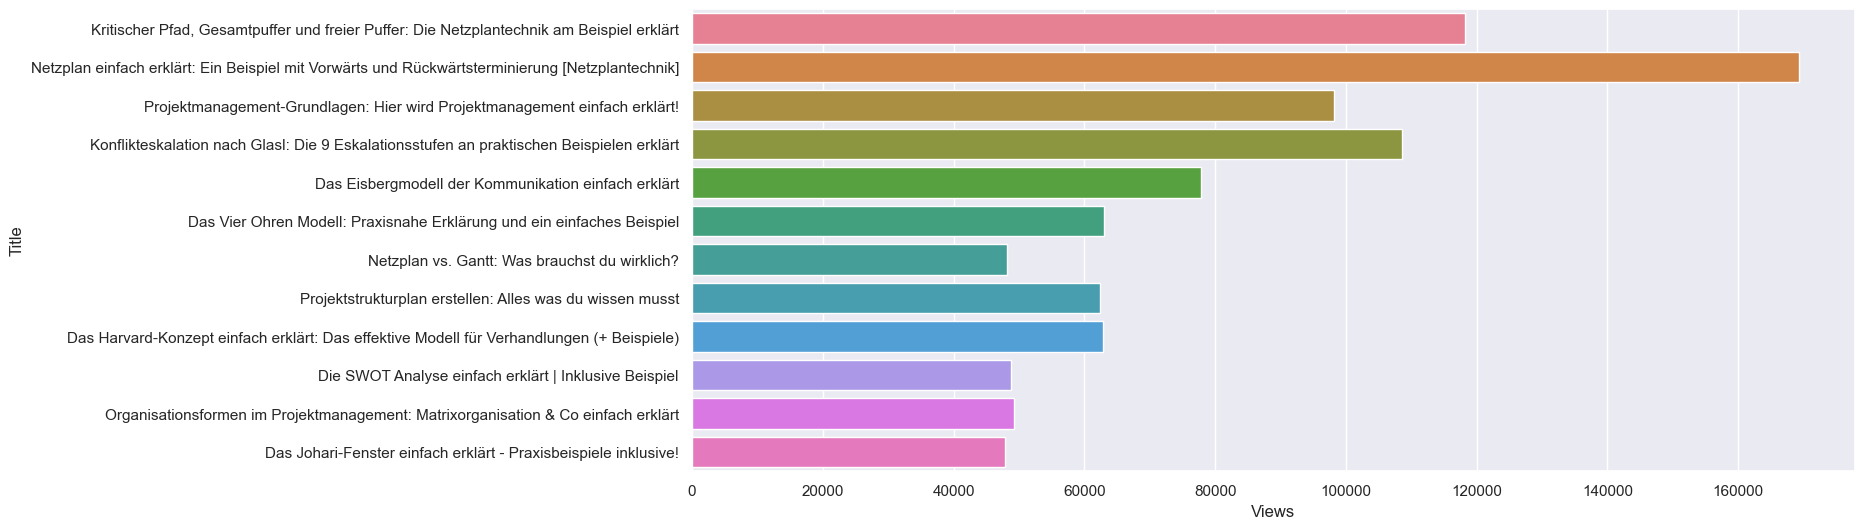

In [101]:
ax1 = sns.barplot(x='Views', y='Title', hue= 'Title', data= top_12_Videos)

In [102]:
videos_df

,Title,upload_date,Views,Likes,Comments
0,"""Projekte leicht gemacht"" stellt sich vor!",2024-01-09,2283,37,1
1,👉 Der Design Thinking Prozess,2022-10-06,8548,112,4
2,❓ Was ist Design Thinking? Die Methodik einfac...,2022-09-29,5136,102,5
3,ABC Analyse: Schrittweise am einfachen Beispie...,2022-04-07,26897,495,19
4,Ressourcenplanung und Kapazitätsplanung im Pro...,2022-03-10,20780,327,4
...,...,...,...,...,...
70,Das Pomodoro-Prinzip: Die wichtigsten Fragen u...,2020-05-14,3078,118,4
71,Morphologischer Kasten einfach erklärt [Kreati...,2020-05-14,34114,685,22
72,Was ist ein Projekt? (Teil 2) – Die Projektme...,2020-05-14,26514,747,16
73,Was ist ein Projekt? (Teil 1) – Eine anschaul...,2020-05-13,31835,648,9


In [104]:
# A new column has been added to display the abbreviated month when each video was published. 
videos_df['Month'] = pd.to_datetime(videos_df['upload_date']).dt.strftime('%b')
videos_df

,Title,upload_date,Views,Likes,Comments,Month
0,"""Projekte leicht gemacht"" stellt sich vor!",2024-01-09,2283,37,1,Jan
1,👉 Der Design Thinking Prozess,2022-10-06,8548,112,4,Oct
2,❓ Was ist Design Thinking? Die Methodik einfac...,2022-09-29,5136,102,5,Sep
3,ABC Analyse: Schrittweise am einfachen Beispie...,2022-04-07,26897,495,19,Apr
4,Ressourcenplanung und Kapazitätsplanung im Pro...,2022-03-10,20780,327,4,Mar
...,...,...,...,...,...,...
70,Das Pomodoro-Prinzip: Die wichtigsten Fragen u...,2020-05-14,3078,118,4,May
71,Morphologischer Kasten einfach erklärt [Kreati...,2020-05-14,34114,685,22,May
72,Was ist ein Projekt? (Teil 2) – Die Projektme...,2020-05-14,26514,747,16,May
73,Was ist ein Projekt? (Teil 1) – Eine anschaul...,2020-05-13,31835,648,9,May


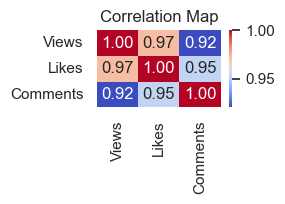

In [105]:
# Correlation matrix generated for subscribers, views, and total videos.
videos_data_int = videos_df.loc[:,['Views','Likes','Comments']]
correlation_matrix1 = videos_data_int.corr()

# Visualization of the correlation heatmap
plt.figure(figsize=(2,1))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map')
plt.show()

In [106]:
correlation_matrix1

,Views,Likes,Comments
Views,1.000000,0.972084,0.920492
Likes,0.972084,1.000000,0.952776
Comments,0.920492,0.952776,1.000000


We observe a correlation between the number of likes and comments, as well as between views and the number of likes and comments.
However, a strong correlation is evident between Subscribers and Views on the correlation map

In [115]:
# A new column has been added to display the engagement rate for each video, indicating the percentage of viewers interacting with the video by 
# giving a like or writing a comment 
videos_df['Engagement_rate'] = ((videos_df['Likes'] + videos_df['Comments']) / videos_df['Views']) * 100
videos_df.head(25)

,Title,upload_date,Views,Likes,Comments,Month,Engagement_rate
0,"""Projekte leicht gemacht"" stellt sich vor!",2024-01-09,2283,37,1,Jan,1.664477
1,👉 Der Design Thinking Prozess,2022-10-06,8548,112,4,Oct,1.357043
2,❓ Was ist Design Thinking? Die Methodik einfac...,2022-09-29,5136,102,5,Sep,2.083333
3,ABC Analyse: Schrittweise am einfachen Beispie...,2022-04-07,26897,495,19,Apr,1.910994
4,Ressourcenplanung und Kapazitätsplanung im Pro...,2022-03-10,20780,327,4,Mar,1.592878
5,Das Vier Ohren Modell: Praxisnahe Erklärung un...,2022-02-24,62959,1235,23,Feb,1.998126
6,Weiterbildung als Erfolgsfaktor im Projekt [ak...,2022-02-10,1262,35,2,Feb,2.931854
7,Der PDCA Zyklus einfach erklärt – 2 anschaulic...,2022-01-27,43050,845,18,Jan,2.004646
8,Spannendes zum Stand des Projektmanagements [a...,2022-01-12,1914,38,4,Jan,2.194357
9,Organisationsformen im Projektmanagement: Matr...,2021-12-16,49284,1149,50,Dec,2.432838


In [109]:
average_engagement_rate = round(videos_df['Engagement_rate'].mean(),2)
average_engagement_rate

2.25

We observe that the channel 'Projekte leicht gemacht' has an average engagement rate of 2.25%. This indicates that 2.25% of the viewers 
who watch the channel's content interact by leaving a comment or giving a like to the videos.

In [111]:
# Grouping the data by month to obtain a table showing the number of videos published in each month, sorted in descending order.
videos_per_mont = videos_df.groupby('Month', as_index=False).size()
videos_per_mont.sort_values('size',ascending=False)

,Month,size
8,May,11
5,Jul,8
10,Oct,8
6,Jun,7
9,Nov,7
11,Sep,7
3,Feb,6
4,Jan,6
7,Mar,5
0,Apr,4


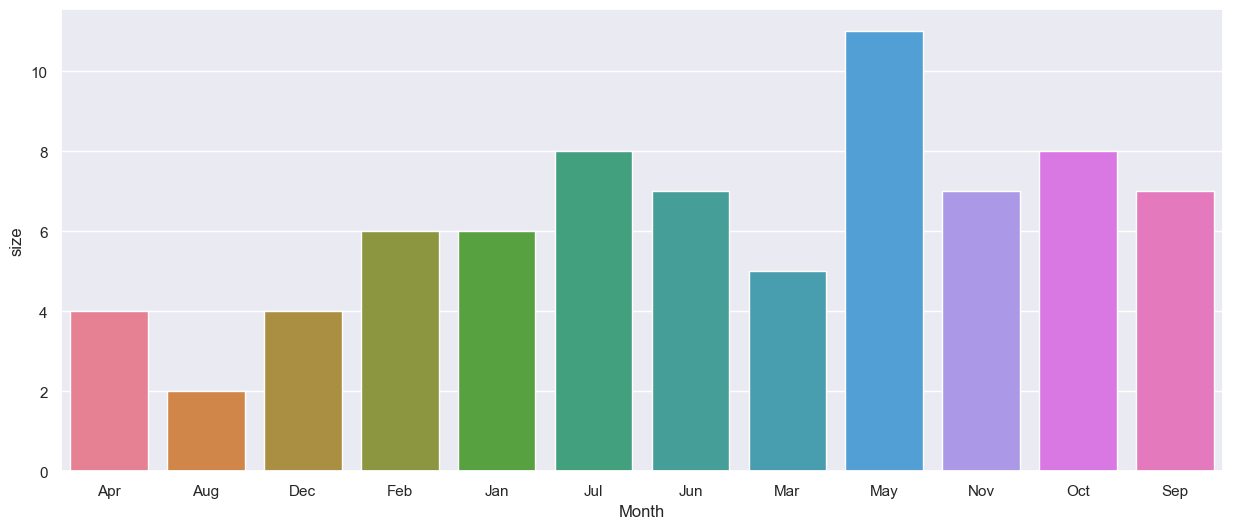

In [112]:
ax2 = sns.barplot(data=videos_per_mont,x='Month', y='size', hue='Month')

May, July, and October are the months when the channel uploads the most videos.

In [113]:
# Grouping the data by month to obtain a table showing the total views per month, sorted in descending order.
views_per_month = videos_df.groupby('Month')['Views'].sum().reset_index()
views_per_month.sort_values('Views',ascending=False)

,Month,Views
9,Nov,476873
4,Jan,209637
2,Dec,183114
8,May,176139
10,Oct,150460
3,Feb,141937
11,Sep,128017
6,Jun,109477
7,Mar,103448
5,Jul,88309


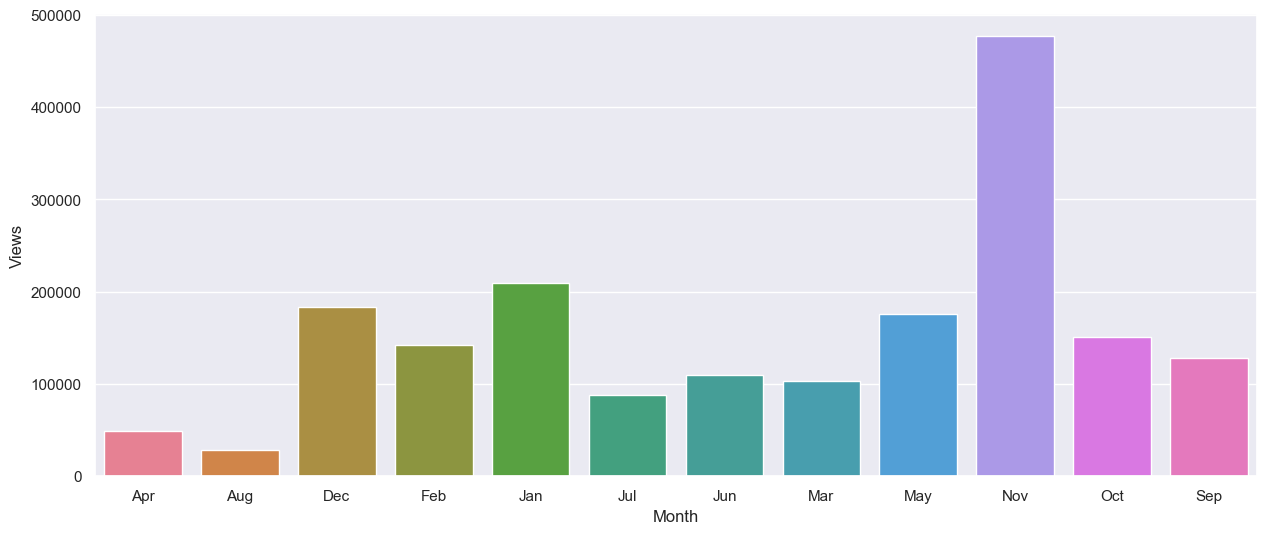

In [114]:
ax3 = sns.barplot(data= views_per_month, x='Month', y='Views', hue='Month')

While posting more videos in a specific month does not necessarily translate to more views. Also, there isn't a consistent correlation between 
the date when a video is uploaded and the number of views over time.

November, January, and December are the months with the most views. 

In the case of November, the explanation for why it is significantly larger than
the other months of the year is that a video was published specifically in November that seems to have caught the attention of the audience 
(Netzplan einfach erklärt: Ein Beispiel mit Vorwärts und Rückwärtsterminierung [Netzplantechnik] with 169,000 views)

In [ ]:
# saving the dataset

In [47]:
videos_df.to_csv('Video_Details(Projekte leicht gemacht).csv')